# 누적 막대 그래프와 회귀분석

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.notebook_repr_html', False)
'''
Jupyter Notebook에서 HTML 테이블 렌더링이 느릴 때 속도를 높이기 위해
텍스트 기반 출력을 원할 때 (예: 로그 파일에 저장할 때) -> 터미널과 같은 형식식
Jupyter가 아닌 환경(예: 콘솔, 스크립트)에서 실행할 때 HTML 출력 방지
'''

'\nJupyter Notebook에서 HTML 테이블 렌더링이 느릴 때 속도를 높이기 위해\n텍스트 기반 출력을 원할 때 (예: 로그 파일에 저장할 때) -> 터미널과 같은 형식식\nJupyter가 아닌 환경(예: 콘솔, 스크립트)에서 실행할 때 HTML 출력 방지\n'

In [17]:
df = pd.read_csv('stacked_ratio.csv', encoding="CP949")
df.head()

  deviceId    부재  미활동    활동   주의  낙상
0      #01  2793  843   664   20   0
1      #02  3906  175   236    3   0
2      #03  2827  275  1042  174   2
3      #04  1046  613  2647   14   0
4      #05  1046  650  2606   17   1

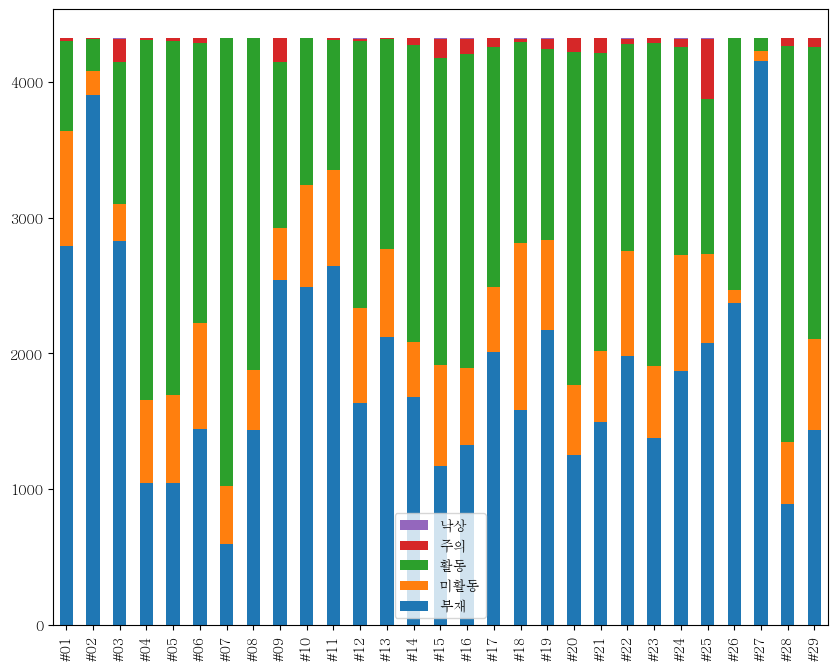

In [18]:
plt.rc('font', family='batang')

plt.rcParams['figure.figsize'] = [10,8]
ax = df.plot.bar(stacked=True)
ax.set_xticklabels(df['deviceId'])

handles, labels = ax.get_legend_handles_labels()
# reverse both handles and labels
ax.legend(list(reversed(handles)), list(reversed(labels)), loc='best')
# 범례 순서가 반대로 나오므로 거꾸로 변환


hatch='' (*,/,-)등으로 스타일을 지정해서 막대 그래프의 스타일을 변경할 수 있지만
stacked=True를 사용하지 않아 누적 막대그래프를 만드려면 bottom=을 이용해 수동으로 쌓아야 함.

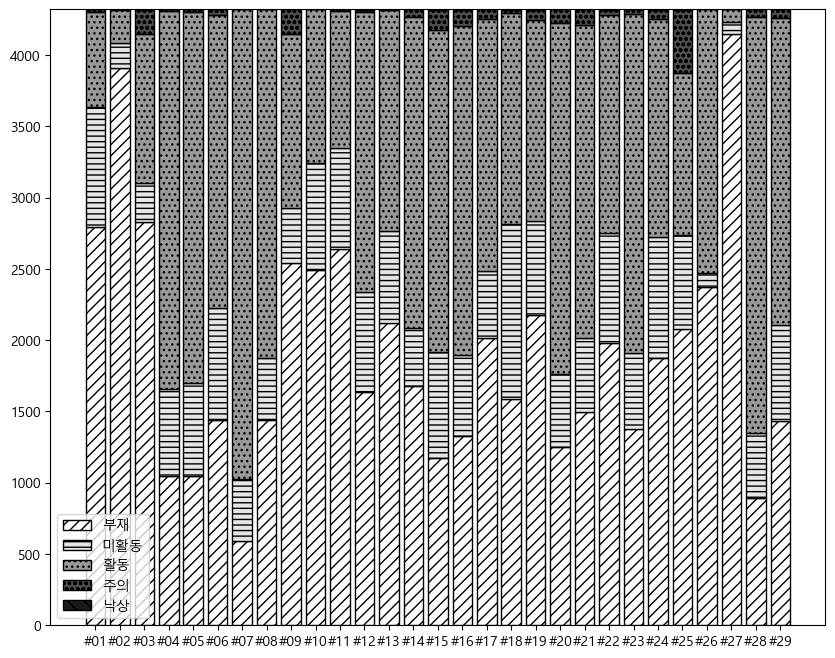

In [19]:
plt.style.use('default') 
plt.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize'] = [10, 8]

deviceId = df['deviceId']
fall = df['낙상']
caution = df['주의']
action = df['활동']
no_action = df['미활동']
absent = df['부재']

plt.bar(deviceId, absent, edgecolor='black', color='w',
        hatch="///", label='부재')
plt.bar(deviceId, no_action, bottom=absent, edgecolor='black',
        color='0.9', hatch="---", label='미활동')
plt.bar(deviceId, action, bottom=absent+no_action,
        edgecolor='black', color='0.6', hatch="...", label='활동')
plt.bar(deviceId, caution, bottom=absent+no_action+action,
        edgecolor='black', color='0.3', hatch="ooo", label='주의')
plt.bar(deviceId, fall, bottom=absent+no_action+action+caution,
        edgecolor='black', color='0.1', hatch='\\\\', label='낙상')

plt.legend(loc='best')
plt.show()

부재는 중요도가 낮으므로 제거후에 그리기

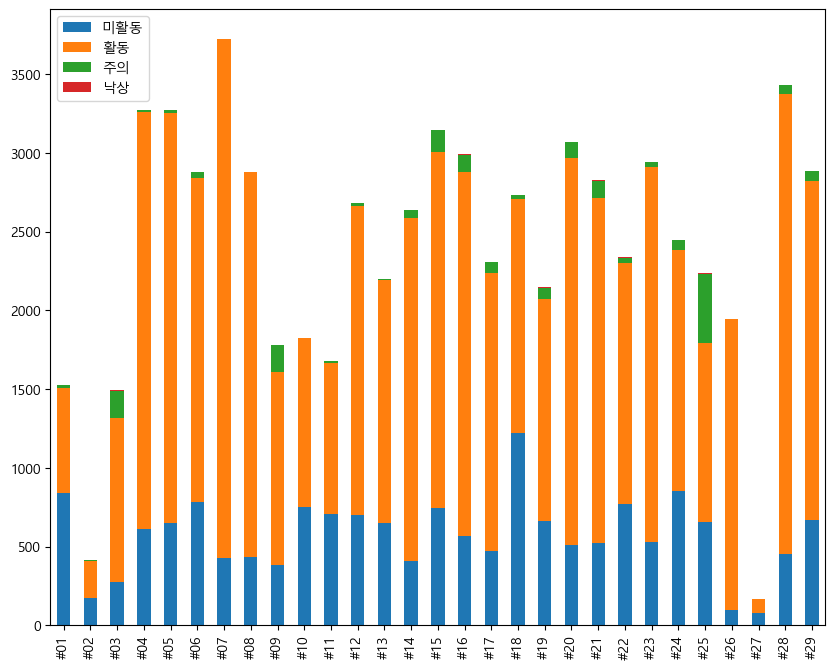

In [20]:
df_not_absence = pd.read_csv('stacked_ratio.csv', encoding="CP949")

plt.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize'] = [10, 8]

df_not_absence_2 = df_not_absence.drop('부재', axis=1)

ax = df_not_absence_2.plot.bar(stacked=True)
ax.set_xticklabels(df['deviceId'])


ax.legend(loc='best')

#25에서 주의가 가장 빈번히 일어났으므로 확인인

In [21]:
pd.set_option('display.notebook_repr_html', False)

# 부재 정보를 포함해서 살펴보자
df_ratio_25 = pd.read_csv('stacked_one_25.csv',
                       dtype={'day':object, '부재':int, '미활동':int,
                              '활동':int,'주의':int,'낙상':int},
                       encoding="CP949")
df_ratio_25.head()

     day  부재  미활동  활동  주의  낙상
0  09/01   0   27  37  20   0
1  09/02   0   26  47   8   0
2  09/03   0   34  44  15   0
3  09/04   0   17  30  15   0
4  09/05   0   24  43  14   0

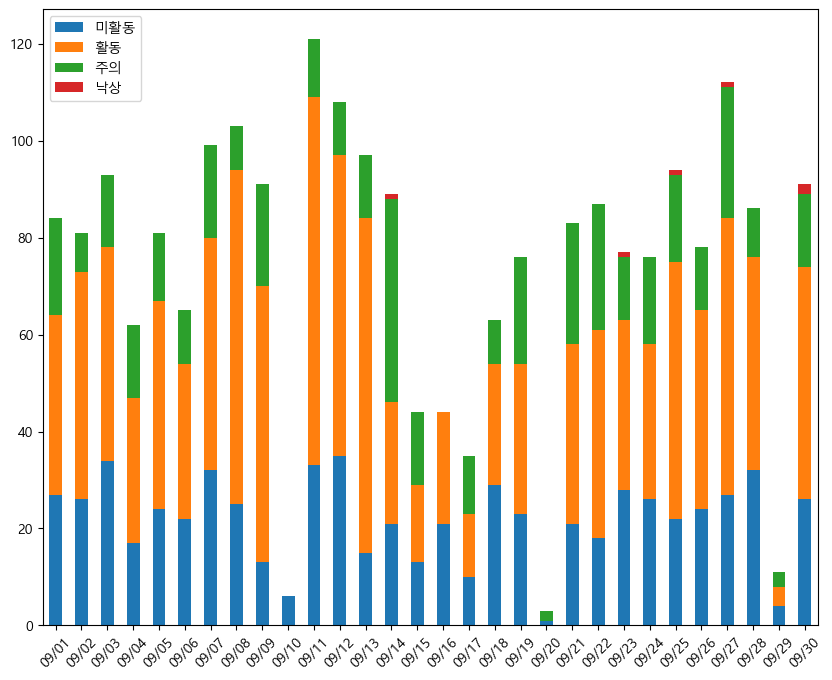

In [22]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize'] = [10, 8]

df_ratio_25 = df_ratio_25.drop('부재', axis=1)


ax = df_ratio_25.plot.bar(stacked=True)
ax.set_xticklabels(df_ratio_25['day'])


ax.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

주의가 전체적으로 많이 발견됨. 후에 하반신이 불편해 바닥에 앉아있던 것으로 확인

#19의 데이터 작성

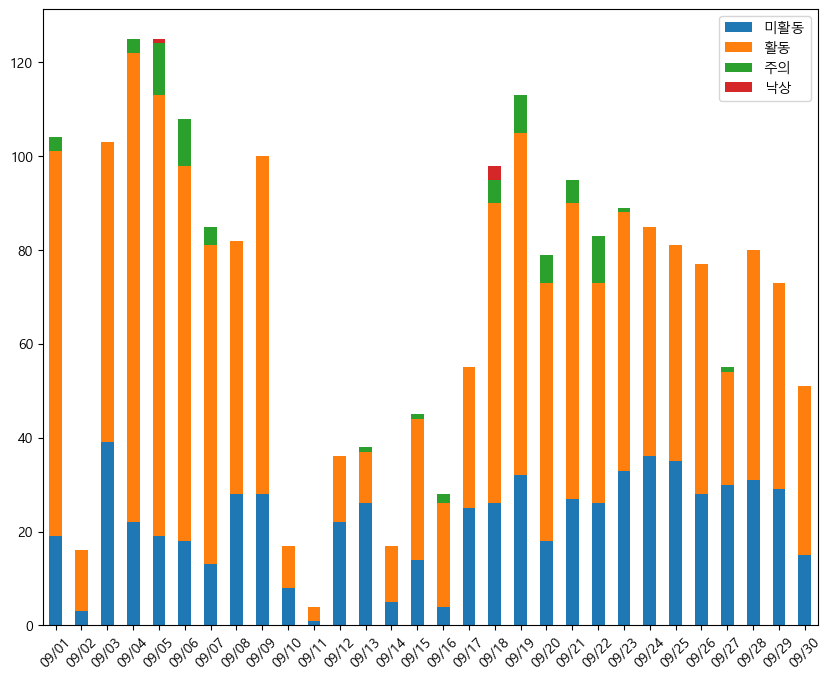

In [23]:
pd.set_option('display.notebook_repr_html', False)

# 부재 정보를 포함해서 살펴보자
df_ratio_19 = pd.read_csv('stacked_one_19.csv',
                       dtype={'day':object, '부재':int, '미활동':int,
                              '활동':int,'주의':int,'낙상':int},
                       encoding="CP949")

plt.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize'] = [10, 8]

df_ratio_19 = df_ratio_19.drop('부재', axis=1)


ax = df_ratio_19.plot.bar(stacked=True)
ax.set_xticklabels(df_ratio_19['day'])


ax.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

18일날만 낙상이 자주 발생된 것이 확인 됨. 

다른 노약자들에 비해 특이 데이터가 있다면 낙상예방을 위해해 의료종사자들의 주의가 필요

# 상관관계와 회귀 분석

In [24]:
df_summary = pd.read_csv('fall_summary_cleaned.csv', encoding="CP949")
df_summary

    deviceId    mon  caution  fall
0        #01  23/01     35.0   1.0
1        #01  23/07    130.0   6.0
2        #01  23/08     94.0   3.0
3        #01  23/11     48.0   1.0
4        #01  23/12     54.0   1.0
..       ...    ...      ...   ...
282      #41  23/08    754.0  18.0
283      #41  23/09    218.0   1.0
284      #41  23/10     86.0   0.0
285      #41  23/11     30.0   0.0
286      #41  23/12     47.0   2.0

[287 rows x 4 columns]

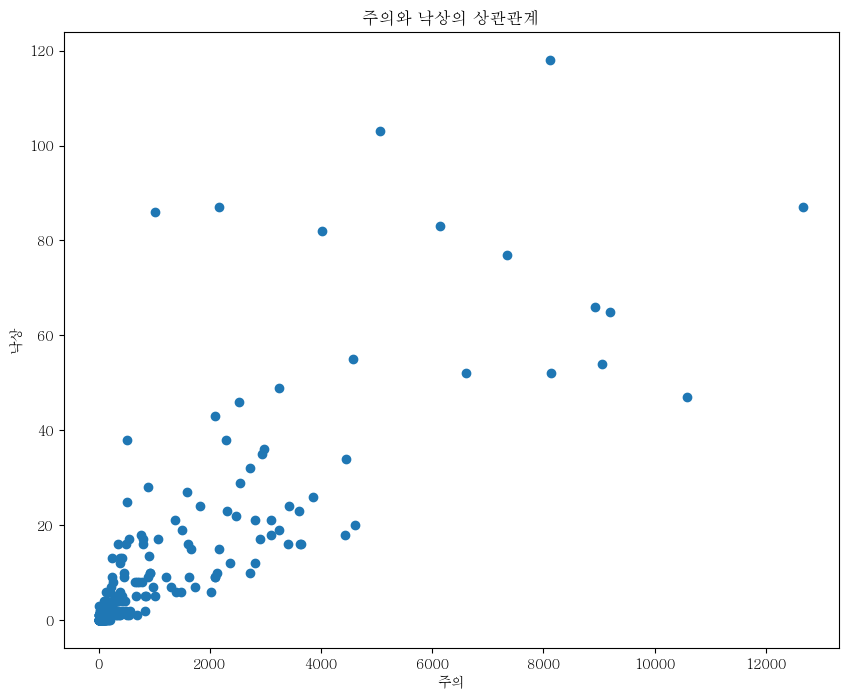

In [25]:
plt.rc('font', family='batang')

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(df_summary['caution'], df_summary['fall'])
ax.set_xlabel('주의')
ax.set_ylabel('낙상')

plt.title('주의와 낙상의 상관관계')
plt.show()

In [26]:
# 주의와와 낙상 값
X = df_summary.caution.values
Y = df_summary.fall.values
print(X.shape, Y.shape)

# X, Y를 2d array로 변경
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
print(X.shape, Y.shape)

(287,) (287,)
(287, 1) (287, 1)


In [27]:
# 회귀분석하기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X, Y) #학습   

# r 계수
print (lr.coef_[0])

# y 절편
print (lr.intercept_)

[0.0080895]
[1.80248273]


회귀선의 1차 방적식: y = 0.008x + 1.8025

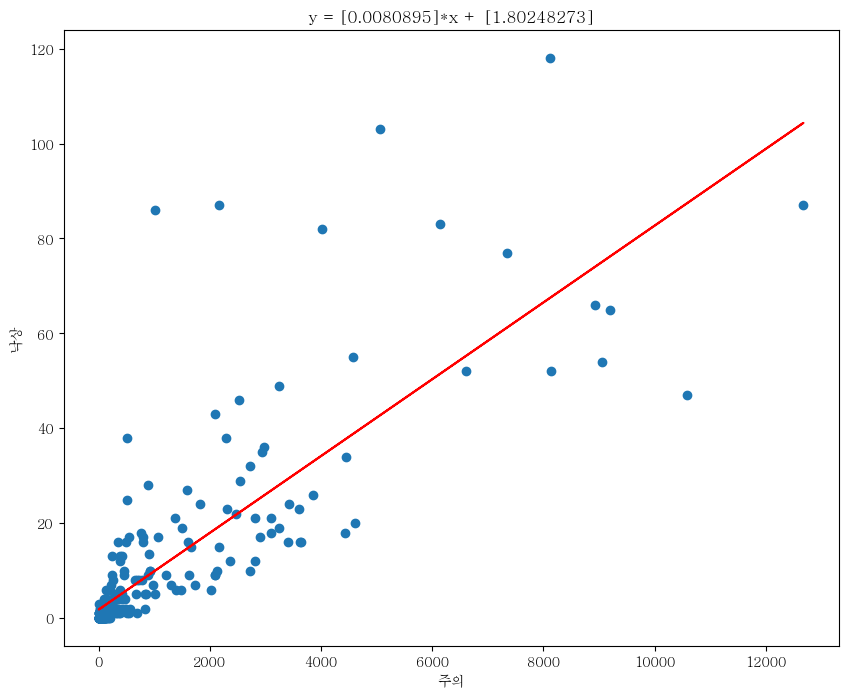

In [28]:
NewY = lr.coef_[0]*X +lr.intercept_

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X, Y)
ax.set_xlabel('주의')
ax.set_ylabel('낙상')

plt.plot(X, NewY, color='red') #실제값과 예측값을 비교하기 위해
plt.title('y = {}*x + {}'.format(lr.coef_[0], lr.intercept_))
plt.show()

주의가 많을 수록 낙상도 많다는 경향성이 확인되었고
회귀선을 통해 주의 횟수가 주어졌을 때 낙상이 발생할 수 있는 횟수를 예측할 수 있게 됨.

y=0.0080895x + 1.80248273이니
- 주의(x)가 50회가 주어진다면 
- y=0.0080895 * 50 + 1.80248273 = 2.2
- 2.2번의 낙상이 발생할 수 있음을 의미

In [29]:
import statsmodels.api as sm

res = sm.OLS(Y, sm.add_constant(X)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     559.0
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           3.75e-69
Time:                        15:40:26   Log-Likelihood:                -1085.0
No. Observations:                 287   AIC:                             2174.
Df Residuals:                     285   BIC:                             2181.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8025      0.700      2.575      0.011       0.425       3.180
x1             0.0081      0.000     23.643      0.000       0.007       0.009
==============================================================================
Omnibus:                      254.970   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5762.432
Skew:                           3.562   Prob(JB):                         0.00
Kurtosis:                      23.764   Cond. No.                     2.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""